In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pickle
import pandas as pd

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file to inspect its content
file_path = '/content/data_berita.csv'
data = pd.read_csv(file_path)

# Display the first few rows and columns of the DataFrame
data.head()

,No,Judul Berita,Isi Berita,Tanggal Berita,Kategori Berita
0,1,Simak Jadwal dan Lokasi SIM Keliling di Jakart...,"JAKARTA, KOMPAS.com - Surat Izin Mengemudi (S...",07/09/2024,OTOMOTIF
1,2,[POPULER OTOMOTIF] Diskon Motor Honda Septembe...,"JAKARTA, KOMPAS.com - Banyak pembaca yang ingi...",07/09/2024,OTOMOTIF
2,3,"Cek Saldo Minimal BRI, BNI, BCA, Mandiri, dan BSI","JAKARTA, KOMPAS.com - Penting bagi calon nasab...",06/09/2024,MONEY
3,4,"KAI Uji Coba Teknologi ""Face Recognition Board...",KOMPAS.com - PT Kereta Api Indonesia (KAI) Div...,06/09/2024,MONEY
4,5,OJK Blokir 10.890 Entitas Keuangan Ilegal Seja...,"JAKARTA, KOMPAS.com - Otoritas Jasa Keuangan (...",06/09/2024,MONEY


In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Mengunduh stopwords dari NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

def cleansing(text):
    # Menghapus karakter non-alfabet
    return re.sub(r'[^a-zA-Z\s]', '', text)

def case_folding(text):
    # Mengubah semua huruf menjadi kecil
    return text.lower()

def tokenize(text):
    # Memecah teks menjadi kata-kata
    return text.split()

def stopword_removal(tokens):
    # Menghapus stopwords
    return [word for word in tokens if word not in stop_words]

def preprocess_text(row):
    # Melakukan preprocessing dan menyimpan hasil pada kolom baru
    original_text = row['Isi Berita']

    # Cleansing
    cleansed_text = cleansing(original_text)

    # Case Folding
    folded_text = case_folding(cleansed_text)

    # Tokenization
    tokens = tokenize(folded_text)

    # Stopword Removal
    filtered_tokens = stopword_removal(tokens)

    # Clean Text
    clean_text_result = ' '.join(filtered_tokens)

    return pd.Series({
        'Judul Berita': row['Judul Berita'],
        'Tanggal Berita': row['Tanggal Berita'],
        'Isi Berita': original_text,
        'Kategori Berita': row['Kategori Berita'],
        'Cleansing': cleansed_text,
        'Case_folding': folded_text,
        'Tokenize': ' '.join(tokens),
        'Stopword_removal': ' '.join(filtered_tokens),
        'Clean_text': clean_text_result
    })

# Membaca file CSV
data = pd.read_csv('data_berita.csv')

# Menerapkan preprocessing pada setiap baris dan mengembalikan DataFrame baru
processed_data = data.apply(preprocess_text, axis=1)

# Menyimpan hasil ke CSV baru
processed_data.to_csv('data_berita_preprocessed.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the CSV file to inspect its content
file_path = '/content/data_berita_preprocessed.csv'
data = pd.read_csv(file_path)

# Display the first few rows and columns of the DataFrame
data.head()


,Judul Berita,Tanggal Berita,Isi Berita,Kategori Berita,Cleansing,Case_folding,Tokenize,Stopword_removal,Clean_text
0,Simak Jadwal dan Lokasi SIM Keliling di Jakart...,07/09/2024,"JAKARTA, KOMPAS.com - Surat Izin Mengemudi (S...",OTOMOTIF,JAKARTA KOMPAScom Surat Izin Mengemudi SIM w...,jakarta kompascom surat izin mengemudi sim w...,jakarta kompascom surat izin mengemudi sim waj...,jakarta kompascom surat izin mengemudi sim waj...,jakarta kompascom surat izin mengemudi sim waj...
1,[POPULER OTOMOTIF] Diskon Motor Honda Septembe...,07/09/2024,"JAKARTA, KOMPAS.com - Banyak pembaca yang ingi...",OTOMOTIF,JAKARTA KOMPAScom Banyak pembaca yang ingin t...,jakarta kompascom banyak pembaca yang ingin t...,jakarta kompascom banyak pembaca yang ingin ta...,jakarta kompascom pembaca diskon motor honda s...,jakarta kompascom pembaca diskon motor honda s...
2,"Cek Saldo Minimal BRI, BNI, BCA, Mandiri, dan BSI",06/09/2024,"JAKARTA, KOMPAS.com - Penting bagi calon nasab...",MONEY,JAKARTA KOMPAScom Penting bagi calon nasabah ...,jakarta kompascom penting bagi calon nasabah ...,jakarta kompascom penting bagi calon nasabah u...,jakarta kompascom calon nasabah saldo minimal ...,jakarta kompascom calon nasabah saldo minimal ...
3,"KAI Uji Coba Teknologi ""Face Recognition Board...",06/09/2024,KOMPAS.com - PT Kereta Api Indonesia (KAI) Div...,MONEY,KOMPAScom PT Kereta Api Indonesia KAI Divre I...,kompascom pt kereta api indonesia kai divre i...,kompascom pt kereta api indonesia kai divre i ...,kompascom pt kereta api indonesia kai divre i ...,kompascom pt kereta api indonesia kai divre i ...
4,OJK Blokir 10.890 Entitas Keuangan Ilegal Seja...,06/09/2024,"JAKARTA, KOMPAS.com - Otoritas Jasa Keuangan (...",MONEY,JAKARTA KOMPAScom Otoritas Jasa Keuangan OJK ...,jakarta kompascom otoritas jasa keuangan ojk ...,jakarta kompascom otoritas jasa keuangan ojk t...,jakarta kompascom otoritas jasa keuangan ojk m...,jakarta kompascom otoritas jasa keuangan ojk m...


In [ ]:
import ast
import pandas as pd

# Salin dataframe
df_doc = data.copy()

# Fungsi untuk menangani literal_eval dengan aman
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return x  # Kembalikan nilai asli jika tidak bisa di-evaluasi

# Mengonversi string menjadi list jika perlu
df_doc['Stopword_removal'] = df_doc['Stopword_removal'].apply(safe_literal_eval)

# Membuat kolom baru 'clean_text' dengan menggabungkan list dalam 'stopword_removal' menjadi kalimat biasa
df_doc['Clean_text'] = df_doc['Stopword_removal'].apply(lambda x: ' '.join([str(word) for word in x]) if isinstance(x, list) else str(x))

df_doc

,Judul Berita,Tanggal Berita,Isi Berita,Kategori Berita,Cleansing,Case_folding,Tokenize,Stopword_removal,Clean_text
0,Simak Jadwal dan Lokasi SIM Keliling di Jakart...,07/09/2024,"JAKARTA, KOMPAS.com - Surat Izin Mengemudi (S...",OTOMOTIF,JAKARTA KOMPAScom Surat Izin Mengemudi SIM w...,jakarta kompascom surat izin mengemudi sim w...,jakarta kompascom surat izin mengemudi sim waj...,jakarta kompascom surat izin mengemudi sim waj...,jakarta kompascom surat izin mengemudi sim waj...
1,[POPULER OTOMOTIF] Diskon Motor Honda Septembe...,07/09/2024,"JAKARTA, KOMPAS.com - Banyak pembaca yang ingi...",OTOMOTIF,JAKARTA KOMPAScom Banyak pembaca yang ingin t...,jakarta kompascom banyak pembaca yang ingin t...,jakarta kompascom banyak pembaca yang ingin ta...,jakarta kompascom pembaca diskon motor honda s...,jakarta kompascom pembaca diskon motor honda s...
2,"Cek Saldo Minimal BRI, BNI, BCA, Mandiri, dan BSI",06/09/2024,"JAKARTA, KOMPAS.com - Penting bagi calon nasab...",MONEY,JAKARTA KOMPAScom Penting bagi calon nasabah ...,jakarta kompascom penting bagi calon nasabah ...,jakarta kompascom penting bagi calon nasabah u...,jakarta kompascom calon nasabah saldo minimal ...,jakarta kompascom calon nasabah saldo minimal ...
3,"KAI Uji Coba Teknologi ""Face Recognition Board...",06/09/2024,KOMPAS.com - PT Kereta Api Indonesia (KAI) Div...,MONEY,KOMPAScom PT Kereta Api Indonesia KAI Divre I...,kompascom pt kereta api indonesia kai divre i...,kompascom pt kereta api indonesia kai divre i ...,kompascom pt kereta api indonesia kai divre i ...,kompascom pt kereta api indonesia kai divre i ...
4,OJK Blokir 10.890 Entitas Keuangan Ilegal Seja...,06/09/2024,"JAKARTA, KOMPAS.com - Otoritas Jasa Keuangan (...",MONEY,JAKARTA KOMPAScom Otoritas Jasa Keuangan OJK ...,jakarta kompascom otoritas jasa keuangan ojk ...,jakarta kompascom otoritas jasa keuangan ojk t...,jakarta kompascom otoritas jasa keuangan ojk m...,jakarta kompascom otoritas jasa keuangan ojk m...
...,...,...,...,...,...,...,...,...,...
95,Waspada Masalah yang Timbul akibat Telat Ganti...,06/09/2024,"JAKARTA, KOMPAS.com - Oli mesin pada mobil den...",OTOMOTIF,JAKARTA KOMPAScom Oli mesin pada mobil dengan...,jakarta kompascom oli mesin pada mobil dengan...,jakarta kompascom oli mesin pada mobil dengan ...,jakarta kompascom oli mesin mobil transmisi cv...,jakarta kompascom oli mesin mobil transmisi cv...
96,"Sosok Faisal Basri di Mata Para Tokoh, Ekonom ...",06/09/2024,"JAKARTA, KOMPAS.com - Ekonom senior Faisal Bas...",MONEY,JAKARTA KOMPAScom Ekonom senior Faisal Basri ...,jakarta kompascom ekonom senior faisal basri ...,jakarta kompascom ekonom senior faisal basri m...,jakarta kompascom ekonom senior faisal basri m...,jakarta kompascom ekonom senior faisal basri m...
97,"Pendaftaran CPNS Diperpanjang 4 Hari, Pelamar ...",06/09/2024,"JAKARTA, KOMPAS.com - Pemerintah telah memperp...",MONEY,JAKARTA KOMPAScom Pemerintah telah memperpanj...,jakarta kompascom pemerintah telah memperpanj...,jakarta kompascom pemerintah telah memperpanja...,jakarta kompascom pemerintah memperpanjang pen...,jakarta kompascom pemerintah memperpanjang pen...
98,"Harga Emas Terbaru Pegadaian, Jumat 6 Septembe...",06/09/2024,"JAKARTA, KOMPAS.com - Pegadaian menyediakan be...",MONEY,JAKARTA KOMPAScom Pegadaian menyediakan berba...,jakarta kompascom pegadaian menyediakan berba...,jakarta kompascom pegadaian menyediakan berbag...,jakarta kompascom pegadaian menyediakan jenis ...,jakarta kompascom pegadaian menyediakan jenis ...


In [ ]:
# Cek jumlah missing values di setiap kolom
missing_values = df_doc.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
Judul Berita        0
Tanggal Berita      0
Isi Berita          0
Kategori Berita     0
Cleansing           0
Case_folding        0
Tokenize            0
Stopword_removal    0
Clean_text          0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df_doc.loc[:, 'Kategori_encoded'] = label_encoder.fit_transform(df_doc['Kategori Berita'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df_doc)


Nilai sebelum dan sesudah konversi:
{'MONEY': 0, 'OTOMOTIF': 1}

DataFrame setelah Label Encoding:
                                         Judul Berita Tanggal Berita  \
0   Simak Jadwal dan Lokasi SIM Keliling di Jakart...     07/09/2024   
1   [POPULER OTOMOTIF] Diskon Motor Honda Septembe...     07/09/2024   
2   Cek Saldo Minimal BRI, BNI, BCA, Mandiri, dan BSI     06/09/2024   
3   KAI Uji Coba Teknologi "Face Recognition Board...     06/09/2024   
4   OJK Blokir 10.890 Entitas Keuangan Ilegal Seja...     06/09/2024   
..                                                ...            ...   
95  Waspada Masalah yang Timbul akibat Telat Ganti...     06/09/2024   
96  Sosok Faisal Basri di Mata Para Tokoh, Ekonom ...     06/09/2024   
97  Pendaftaran CPNS Diperpanjang 4 Hari, Pelamar ...     06/09/2024   
98  Harga Emas Terbaru Pegadaian, Jumat 6 Septembe...     06/09/2024   
99  Harga Emas Antam Terbaru Jumat 6 September 202...     06/09/2024   

                                   

In [ ]:
# Menyimpan DataFrame ke file CSV
df_doc.to_csv('FILETUGAS4.csv', index=False)

# SPLIT DATA


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
x = df_doc['Clean_text']
y = df_doc['Kategori_encoded']

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     jakarta kompascom surat izin mengemudi sim waj...
1     jakarta kompascom pembaca diskon motor honda s...
2     jakarta kompascom calon nasabah saldo minimal ...
3     kompascom pt kereta api indonesia kai divre i ...
4     jakarta kompascom otoritas jasa keuangan ojk m...
                            ...                        
95    jakarta kompascom oli mesin mobil transmisi cv...
96    jakarta kompascom ekonom senior faisal basri m...
97    jakarta kompascom pemerintah memperpanjang pen...
98    jakarta kompascom pegadaian menyediakan jenis ...
99    jakarta kompascom jumat september harga emas b...
Name: Clean_text, Length: 100, dtype: object
0     1
1     1
2     0
3     0
4     0
     ..
95    1
96    0
97    0
98    0
99    0
Name: Kategori_encoded, Length: 100, dtype: int64
Jumlah data latih: 80
Jumlah data uji: 20


# TF-IDF Weighting

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf

,aaion,aali,abadi,abenkh,abnormal,absurd,ac,acara,access,account,...,yoynamun,yss,ytna,yusdistira,zad,zaman,zenix,zero,zigzag,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029852,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055809,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090299,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037386,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.049825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,aaion,aali,abadi,abenkh,abnormal,absurd,ac,acara,access,account,...,yoynamun,yss,ytna,yusdistira,zad,zaman,zenix,zero,zigzag,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membuat graf berdasarkan co-occurrence fitur
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

                Node  Degree Centrality
0              aaion                0.0
2983         pekerja                0.0
2989  pelaksanaannya                0.0
2988     pelaksanaan                0.0
2987       pelaksana                0.0
...              ...                ...
1498          inidia                0.0
1499     inidirektur                0.0
1500     inidukungan                0.0
1501      inigunawan                0.0
4477            zona                0.0

[4478 rows x 2 columns]


In [ ]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
print(filtered_df_train_tfidf_binary)


DataFrame setelah menghapus fitur di bawah top 10:
    aaion  pekerja  pelaksanaannya  pelaksanaan  pelaksana  pelabuhan  \
0       0        0               0            0          0          0   
1       0        0               0            0          0          0   
2       0        0               0            0          0          0   
3       0        0               0            0          0          0   
4       0        0               0            0          0          0   
..    ...      ...             ...          ...        ...        ...   
75      0        0               0            0          0          0   
76      0        0               0            0          0          0   
77      0        0               0            0          0          0   
78      0        0               0            0          0          0   
79      0        0               0            0          0          0   

    pekerjaankualifikasi  pekerjaan  pekan  pedang  
0                 

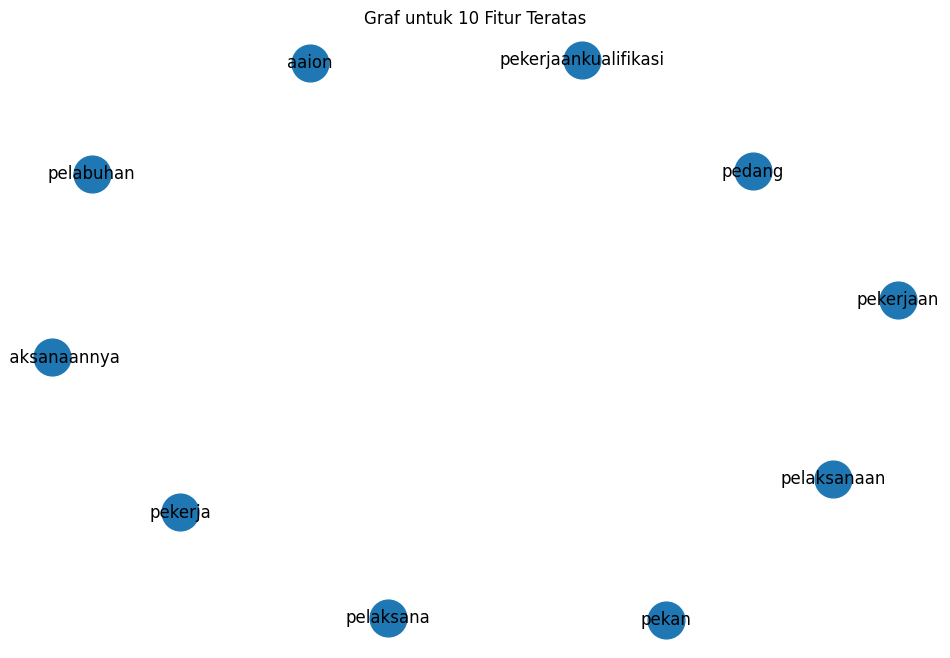

In [ ]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

                   Node  Degree Centrality  Closeness Centrality  \
0                 aaion                0.0                   0.0   
1               pekerja                0.0                   0.0   
2        pelaksanaannya                0.0                   0.0   
3           pelaksanaan                0.0                   0.0   
4             pelaksana                0.0                   0.0   
5             pelabuhan                0.0                   0.0   
6  pekerjaankualifikasi                0.0                   0.0   
7             pekerjaan                0.0                   0.0   
8                 pekan                0.0                   0.0   
9                pedang                0.0                   0.0   

   Betweenness Centrality  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity
cosine_sim_matrix = cosine_similarity(df_train_tfidf_binary[top_10_features].T)

# Membuat DataFrame untuk cosine similarity
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=top_10_features, columns=top_10_features)

# Menampilkan hasil cosine similarity
print("Cosine Similarity antara Fitur Teratas:")
print(df_cosine_sim)

Cosine Similarity antara Fitur Teratas:
                      aaion  pekerja  pelaksanaannya  pelaksanaan  pelaksana  \
aaion                   0.0      0.0             0.0          0.0        0.0   
pekerja                 0.0      0.0             0.0          0.0        0.0   
pelaksanaannya          0.0      0.0             0.0          0.0        0.0   
pelaksanaan             0.0      0.0             0.0          0.0        0.0   
pelaksana               0.0      0.0             0.0          0.0        0.0   
pelabuhan               0.0      0.0             0.0          0.0        0.0   
pekerjaankualifikasi    0.0      0.0             0.0          0.0        0.0   
pekerjaan               0.0      0.0             0.0          0.0        0.0   
pekan                   0.0      0.0             0.0          0.0        0.0   
pedang                  0.0      0.0             0.0          0.0        0.0   

                      pelabuhan  pekerjaankualifikasi  pekerjaan  pekan  \
aaio

# Mengambil 1 Berita

Berita Kompas Otomotif : https://otomotif.kompas.com/read/2024/09/07/060200715/-populer-otomotif-diskon-motor-honda-september-2024-toyota-new-fortuner

**Isi Berita Otomotif** :  Jakarta - Honda menawarkan diskon untuk motor mereka
pada September 2024. Untuk model Honda CT125, harga on the road mencapai Rp 81.850.000. Bagi yang ingin gaya CT125 dengan anggaran terbatas, modifikasi Supra X 125 menjadi alternatif menarik. Di bengkel Insan Motor Bekasi, modifikasi ini dapat dilakukan dengan biaya sekitar Rp 18 juta hingga Rp 20 juta. Bodinya akan diganti dengan set replika CT125 dari fiberglass, menggunakan basis Supra lama yang masih karburator.

Berita Kompas Money : https://money.kompas.com/read/2024/09/06/233526726/kai-uji-coba-teknologi-face-recognition-boarding-gate-di-stasiun-medan?page=all

**Isi Berita Money** : Medan - PT Kereta Api Indonesia (Persero) Divre I Sumatera Utara menguji coba teknologi Face Recognition Boarding Gate di Stasiun Medan mulai 5 September 2024. Teknologi ini dirancang untuk mempermudah dan mempercepat proses boarding penumpang kereta api. Pelanggan hanya perlu melakukan pemindaian wajah yang terintegrasi dengan data tiket, tanpa harus menunjukkan KTP atau bukti cetak tiket.

Terdapat dua unit mesin Face Recognition yang sedang diuji coba di gate Stasiun Medan. Registrasi dapat dilakukan sekali melalui aplikasi Access by KAI atau langsung di stasiun. Pelanggan yang ingin mendaftar cukup membawa e-KTP dan melakukan pemindaian jari telunjuk. "Proses registrasi ini cepat dan mudah, bisa dilakukan dengan bantuan petugas," jelas Manajer Humas KAI Divre I Sumut, Anwar Solikhin.

Setelah registrasi, penumpang tidak perlu mencetak boarding pass. Cukup arahkan wajah ke mesin pemindai, dan jika semua data sesuai, gate akan terbuka otomatis. Teknologi ini diharapkan dapat meningkatkan kenyamanan dan efisiensi dalam perjalanan kereta api.

In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd

# Teks berita yang telah dirapikan
news_textOTO_1 = """
Isi Berita Otomotif: Jakarta - Motor bebek touring Honda CT125 dibanderol sangat mahal, mencapai Rp 81.850.000 on the road Jakarta. Bagi Anda yang memiliki budget terbatas, namun menginginkan motor bebek ikonik seperti CT125, Anda bisa memodifikasi Supra X 125 menjadi bergaya ala CT125. Salah satu bengkel modifikasi yang bisa mengubah Supra X 125 menjadi CT125 adalah bengkel Insan Motor Bekasi. Bermodal kocek di angka Rp 18 juta hingga Rp 20 juta, pemilik Supra X 125 bisa mengubah motornya jadi 'semahal' CT125. "Biaya modifikasi Rp 18-20 jutaan. Kalau belum punya motornya, bisa beli bahannya harga Rp 5 jutaan, yang penting surat-suratnya lengkap," ungkap pemilik Insan Motor Bekasi, Yustinus Erwan Santoso. Adapun Supra X 125 yang dimodifikasi jadi CT125 oleh Insan Motor Bekasi ini menggunakan basis Supra lama yang masih pakai karburator. Bodi Supra lama dilucuti diganti dengan body set replika Honda CT125 yang terbuat dari bahan fiberglass.
"""

news_textMONEY_2 = """
Isi Berita Uang: Medan - PT Kereta Api Indonesia (Persero) Divre I Sumatera Utara menguji coba teknologi Face Recognition Boarding Gate di Stasiun Medan mulai 5 September 2024. Teknologi ini dirancang untuk mempermudah dan mempercepat proses boarding penumpang kereta api. Pelanggan hanya perlu melakukan pemindaian wajah yang terintegrasi dengan data tiket, tanpa harus menunjukkan KTP atau bukti cetak tiket. Terdapat dua unit mesin Face Recognition yang sedang diuji coba di gate Stasiun Medan. Registrasi dapat dilakukan sekali melalui aplikasi Access by KAI atau langsung di stasiun. Pelanggan yang ingin mendaftar cukup membawa e-KTP dan melakukan pemindaian jari telunjuk. "Proses registrasi ini cepat dan mudah, bisa dilakukan dengan bantuan petugas," jelas Manajer Humas KAI Divre I Sumut, Anwar Solikhin. Setelah registrasi, penumpang tidak perlu mencetak boarding pass. Cukup arahkan wajah ke mesin pemindai, dan jika semua data sesuai, gate akan terbuka otomatis. Teknologi ini diharapkan dapat meningkatkan kenyamanan dan efisiensi dalam perjalanan kereta api.
"""

# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_textOTO_1, news_textMONEY_2], columns=['text'])

# Menampilkan DataFrame
print(data)


                                                text
0  \nIsi Berita Otomotif: Jakarta - Motor bebek t...
1  \nIsi Berita Uang: Medan - PT Kereta Api Indon...


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)

10 Fitur Terbaik:
     Feature     Score
43    ct125  0.387780
187    yang  0.368817
166   supra  0.332383
46      dan  0.309960
120   motor  0.276986
148      rp  0.276986
1       125  0.221588
33     bisa  0.201770
15      api  0.185976
100   medan  0.185976


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
           ct125      yang     supra       dan     motor        rp       125  \
ct125  1.000000  0.872683  1.000000  0.000000  1.000000  1.000000  1.000000   
yang   0.872683  1.000000  0.872683  0.488287  0.872683  0.872683  0.872683   
supra  1.000000  0.872683  1.000000  0.000000  1.000000  1.000000  1.000000   
dan    0.000000  0.488287  0.000000  1.000000  0.000000  0.000000  0.000000   
motor  1.000000  0.872683  1.000000  0.000000  1.000000  1.000000  1.000000   
rp     1.000000  0.872683  1.000000  0.000000  1.000000  1.000000  1.000000   
125    1.000000  0.872683  1.000000  0.000000  1.000000  1.000000  1.000000   
bisa   0.963023  0.971967  0.963023  0.269417  0.963023  0.963023  0.963023   
api    0.000000  0.488287  0.000000  1.000000  0.000000  0.000000  0.000000   
medan  0.000000  0.488287  0.000000  1.000000  0.000000  0.000000  0.000000   

           bisa       api     medan  
ct125  0.963023  0.000000  0.000000  
yang   0.971967  0.488287  

In [ ]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
        ct125  yang  supra  dan  motor  rp  125  bisa  api  medan
ct125      1     1      1    0      1   1    1     1    0      0
yang       1     1      1    0      1   1    1     1    0      0
supra      1     1      1    0      1   1    1     1    0      0
dan        0     0      0    1      0   0    0     0    1      1
motor      1     1      1    0      1   1    1     1    0      0
rp         1     1      1    0      1   1    1     1    0      0
125        1     1      1    0      1   1    1     1    0      0
bisa       1     1      1    0      1   1    1     1    0      0
api        0     0      0    1      0   0    0     0    1      1
medan      0     0      0    1      0   0    0     0    1      1


In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd
import networkx as nx  # Pastikan ini ditambahkan

# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)



Degree:
 {'ct125': 8, 'yang': 8, 'supra': 8, 'dan': 4, 'motor': 8, 'rp': 8, '125': 8, 'bisa': 8, 'api': 4, 'medan': 4}

Closeness Centrality:
 {'ct125': 0.6666666666666666, 'yang': 0.6666666666666666, 'supra': 0.6666666666666666, 'dan': 0.2222222222222222, 'motor': 0.6666666666666666, 'rp': 0.6666666666666666, '125': 0.6666666666666666, 'bisa': 0.6666666666666666, 'api': 0.2222222222222222, 'medan': 0.2222222222222222}

Betweenness Centrality:
 {'ct125': 0.0, 'yang': 0.0, 'supra': 0.0, 'dan': 0.0, 'motor': 0.0, 'rp': 0.0, '125': 0.0, 'bisa': 0.0, 'api': 0.0, 'medan': 0.0}


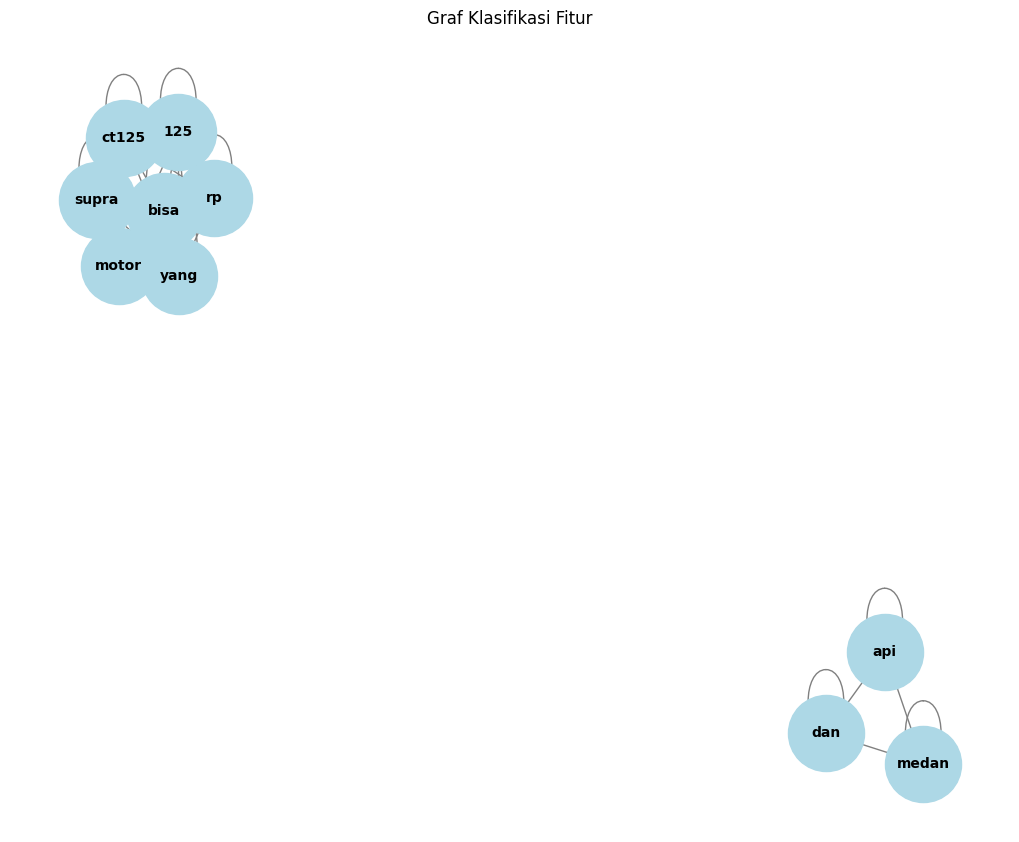

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menggambar graf
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Menggunakan spring layout untuk penempatan node
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title("Graf Klasifikasi Fitur")
plt.show()
